In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# open iris database

def load_dataset():
    dataset = list()

    with open('datasets/iris-slw.dat') as file:
        while True:
            try:
                line = file.readline()
                if len(line) <= 0:
                    break
                line = line.split(' ')
                line = list(map(float, line))
                dataset.append(line)
            except:
                break
    return dataset

dataset = np.matrix(load_dataset())[:,0]


## Univariate Analysis

$D=\begin{pmatrix}
x_1 \\ 
\dots \\ 
x_n
\end{pmatrix}$

dataset

## Empirical Probability Mass Function

$\hat f(x) = P = (X = x) = \frac{1}{n}\sum\limits_{i = 1}^n {I = ({x_i} = x)} $

The empirical cumulative distributio function (CDF) of $X$ is given as

$\hat F(x) = \frac{1}{n}\sum\limits_{i = 1}^n {I({x_i} \le x)} $


The inverse cumulative distribution function qauntile function fo $X$ is defined as follows:

${F^{ - 1}}(q) = \min \{ x|\hat F(x) \ge q\} $ for $q \in [0,1]$

The inverse CDF gives the least value of X, for which $q$ fraction of the values are higher, and $1-q$ fraction of the values are lower.

## Sample Mean: Iris sepal length

$\hat{\mu}  = E[X] = \sum\limits_{i = 1}^n {x_i} $

In [5]:
def mean(x):
    sum_n = 0.0
    n = int(len(x))
    for value in x:
        sum_n += float(value)
    return 1/n * sum_n

mean(dataset)


5.843333333333333

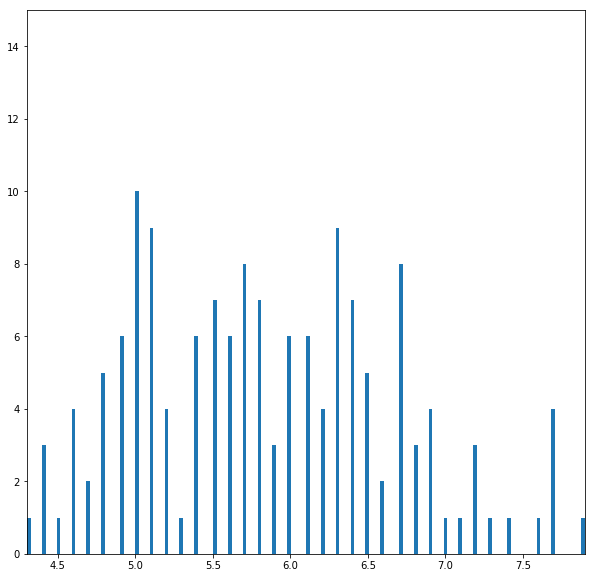

In [28]:
values = dict()

plt.figure(figsize=(10,10))
plt.axis([dataset.min(), dataset.max(), 0, 15])
plt.hist(dataset, len(dataset), histtype='bar', range=(dataset.min(), dataset.max()))
 
plt.show()

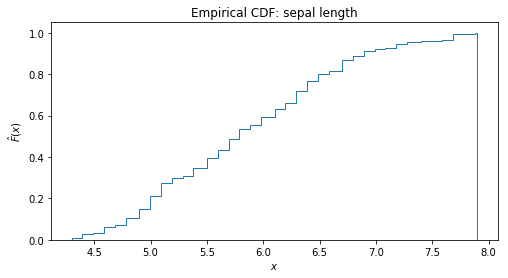

In [29]:
fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
n, bins, patches = ax.hist(dataset, len(dataset), density=True, histtype='step',
                           cumulative=True, label='Empirical')

# tidy up the figure
# ax.grid(True)
# ax.legend(loc='right')
ax.set_title('Empirical CDF: sepal length')
ax.set_xlabel('$x$')
ax.set_ylabel('$\hat{F}(x)$')

plt.show()

Inverse CDF TODO

## Variance and Standard Deviation

The *variance* of a random variable $X$ provides a measure of how much the values of $X$ deviate from the mean or expected value of $X$.

$\sigma  = var(X) = E\left[ {{{\left( {X - \mu } \right)}^2}} \right] = \left\{ {\begin{array}{*{20}{c}}
{\sum\limits_x {{{\left( {x - \mu } \right)}^2}f(x)} }\\
{\int_{ - \infty }^\infty  {{{\left( {x - \mu } \right)}^2}f(x)dx} }
\end{array}} \right.$

The *standard deviation* $\sigma$, is positive square root of the variance, $\sigma^2$.  
The *sample variance* is defined as

${\hat \sigma ^2} = \frac{1}{n}\sum\limits_{i = 1}^n {{{\left( {{x_i} - \hat \mu } \right)}^2}} $

and the *sample standard deviation* is

$\hat \sigma  = \sqrt {\frac{1}{n}\sum\limits_{i = 1}^n {{{\left( {{x_i} - \hat \mu } \right)}^2}} } $

In [34]:
def variance(X):
    return np.var(X)

def std_deviation(X):
    return np.std(X)

Jumps a lot of things

In [60]:
sepal_dataset = np.matrix(load_dataset()).T

$\hat{\mu}=\left ( \begin{array}{*{20}{c}}
{E[X_1]}\\
{E[X_2]}
\end{array} \right )$

In [68]:
np.matrix([sepal_dataset[0,:].mean(), sepal_dataset[1,:].mean()]).T

matrix([[5.84333333],
        [3.054     ]])

## Covariance matrix

$\hat \Sigma  = E\left[ {\left( {{\bf{X}} - \mu } \right){{\left( {{\bf{X}} - \mu } \right)}^T}} \right] = \left( {\begin{array}{*{20}{c}}
{\sigma _1^2}&{{\sigma _{12}}}\\
{{\sigma _{21}}}&{\sigma _2^2}
\end{array}} \right)$

Obvious $\sigma_{12} = \sigma_{21}$.

$var({\bf{D}}) = tr(\Sigma ) = \sigma _1^2 + \sigma _2^2$

In [124]:
n = sepal_dataset.shape[1]
s11 = sepal_dataset[0].var()
s22 = sepal_dataset[1].var()
a = sepal_dataset[0] - np.full(sepal_dataset[0].shape, sepal_dataset[0].mean())
b = sepal_dataset[1] - np.full(sepal_dataset[1].shape, sepal_dataset[1].mean())
s12 = s21 = 1/n * float(a.dot(b.T))

In [125]:
([s11, s12], [s21, s22])

([0.6811222222222222, -0.03900666666666667],
 [-0.03900666666666667, 0.18675066666666665])

## Correlation

${\rho _{12}} = \frac{{{\sigma _{12}}}}{{{\sigma _1}{\sigma _2}}} = \frac{{{\sigma _{12}}}}{{\sqrt {\sigma _1^2\sigma _2^2} }}$

${{\hat \rho }_{12}} = \frac{{{{\hat \sigma }_{12}}}}{{{{\hat \sigma }_1}{{\hat \sigma }_2}}} = \frac{{\sum\nolimits_{i = 1}^n {\left( {{x_{i1}} - {{\hat \mu }_1}} \right)\left( {{x_{i2}} - {{\hat \mu }_2}} \right)} }}{{\sqrt {\sum\nolimits_{i = 1}^n {{{\left( {{x_{i1}} - {{\hat \mu }_1}} \right)}^2}} \sum\nolimits_{i = 1}^n {{{\left( {{x_{i2}} - {{\hat \mu }_2}} \right)}^2}} } }}$

In [126]:
rho12 = s12/(np.sqrt(s11*s22))
rho12

-0.10936924995064937

TODO: create graph with line angle correlation and a lot of things

## Normalization Example

